# Coffee Bean Quality Prediction Analysis

Dataset: https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi

## Project Description and Objective

The dataset is from the Coffee Quality Institute (CQI) and includes data from many different coffee beans along with eleven different tasting scores. Ten of them are different specific aspects of the coffee, such as aroma and acidity, all rated out of ten. The last category is the total taste score, which is the sum of all the other category scores, and is out of 100. The objective of this project is to create a model using the naive bayes classifier to determine if a cup of coffee will be good. 

For the sake of this project a cup of coffee is classified as good if it's total taste score is above average, and classified as bad otherwise.

The last part of this project tests linear regression on this dataset. 

## Importing and Cleaning Up Data

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bokeh.plotting import figure
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

There are many different columns in the dataset, many of which are only relevant to the CQI. The only ones of interest for this project are:

    - Species
    - Country of Origin
    - Variety
    - Processing Method
    - Total Taste Score
    - Unit of Measurement (to see if it was measured in meters or feet)
    - Mean Altitude

I used pandas library in order to read and manipulate the data.

In [2]:
cols = ('Species', 'Country.of.Origin', 'Variety', 'Processing.Method', 'Total.Cup.Points', 'unit_of_measurement', 'altitude_mean_meters')

data = pd.read_csv('merged_data_cleaned.csv', header = 0, usecols = cols)
data

,Species,Country.of.Origin,Variety,Processing.Method,Total.Cup.Points,unit_of_measurement,altitude_mean_meters
0,Arabica,Ethiopia,NaN,Washed / Wet,90.58,m,2075.0
1,Arabica,Ethiopia,Other,Washed / Wet,89.92,m,2075.0
2,Arabica,Guatemala,Bourbon,NaN,89.75,m,1700.0
3,Arabica,Ethiopia,NaN,Natural / Dry,89.00,m,2000.0
4,Arabica,Ethiopia,Other,Washed / Wet,88.83,m,2075.0
...,...,...,...,...,...,...,...
1334,Robusta,Ecuador,NaN,NaN,78.75,m,NaN
1335,Robusta,Ecuador,NaN,NaN,78.08,m,40.0
1336,Robusta,United States,NaN,Natural / Dry,77.17,m,795.0
1337,Robusta,India,NaN,Natural / Dry,75.08,m,NaN


I want to delete all the data with empty cells using the dropna method, and I want to select only the rows that use meters using loc to keep the unit of measurement consistent. This drops the number data points by 500, but there is still 880 points to work with which is a considerable amount especially with naive bayes.

In [3]:
data = data.dropna(how = 'any').loc[data['unit_of_measurement'] == 'm']
data = data.drop('unit_of_measurement', axis = 1)

print(f"Shape of data: {data.shape}")

Shape of data: (880, 6)


I will calculate the average taste score.

In [4]:
avg_cup = np.mean(data['Total.Cup.Points'])
print(f"Average Cup Score: {avg_cup}")

Average Cup Score: 82.13864772727261


Now that the data is cleaned up and the average score is calculated, I can prepare it to be used with the naive bayes method.

## Naive Bayes Classifier

### Pre-Processing

First, I want to replace the total cup points with 0's and 1's, 1 indicating it is a good cup of coffee (above average) and 0 indiciating it is a bad cup of coffee. Secondly, I want to categorize the altitude data since that will be easier to work with naive bayes. I use the qcut method from the pandas library to divide the altitude into evenly split up quartiles. 

In [5]:
NB_data = data.copy()

NB_data['Total.Cup.Points'] = np.where(NB_data['Total.Cup.Points'] < avg_cup, 0, 1)
NB_data['altitude_mean_meters'] = pd.qcut(NB_data['altitude_mean_meters'], 4)

NB_data

,Species,Country.of.Origin,Variety,Processing.Method,Total.Cup.Points,altitude_mean_meters
1,Arabica,Ethiopia,Other,Washed / Wet,1,"(1600.0, 190164.0]"
4,Arabica,Ethiopia,Other,Washed / Wet,1,"(1600.0, 190164.0]"
9,Arabica,Ethiopia,Other,Natural / Dry,1,"(1600.0, 190164.0]"
11,Arabica,United States,Other,Washed / Wet,1,"(1600.0, 190164.0]"
12,Arabica,United States,Other,Washed / Wet,1,"(1600.0, 190164.0]"
...,...,...,...,...,...,...
1307,Arabica,Haiti,Typica,Natural / Dry,0,"(0.999, 1100.0]"
1308,Arabica,Nicaragua,Caturra,Other,0,"(0.999, 1100.0]"
1319,Robusta,India,Other,Washed / Wet,1,"(0.999, 1100.0]"
1322,Robusta,India,Other,Natural / Dry,0,"(0.999, 1100.0]"


The data is divided into labels and features; labels containing the total cup points, and the features containing every other variable. The goal is to predict the labels based on the features. 

Since the bernoulli naive bayes method is being used, which only takes binary data, the pandas get_dummies method is used to get the "dummy variables" of the categories. For example, let's say the only column of data is the country of origin, and there are only three categories: India, Ethiopia, and Zambia. The get_dummies function outputs a data table with three columns: India, Ethiopia, and Zambia, with either a 0 or 1 depending on if a coffee bean originated from there. If a coffee cup originated in Ethiopia, for example, the corresponding row, or feature vector, is $f = (0, 1, 0)$. This is done for all columns and categories of the dataset.

In [6]:
labels = NB_data['Total.Cup.Points']
features = NB_data.drop('Total.Cup.Points', axis = 1)

features = pd.get_dummies(features)

print(f"Shape of feature matrix: {features.shape} \nLength of list of labels: {labels.shape[0]}")

Shape of feature matrix: (880, 68) 
Length of list of labels: 880


The percentage of good coffee in the data is taken to later compare with the accuracy of the naive bayes method to see how it compares to guessing. 

In [7]:
percent_good_coffee = np.mean(labels)
print(f"Percentage of cofffee in the data classified as good: {percent_good_coffee}")

Percentage of cofffee in the data classified as good: 0.5818181818181818


### Using the Naive Bayes Method

The following formula will be used for the bernoulli naive bayes method:

$$L_\pm = X_1\log(P_\pm) + (1 - X_1)\log(1 - P_\pm) + \log(P(\pm))$$

Where

- $X_0$ is the training feature matrix.
- $X_1$ is the testing feature matrix, to be predicted.
- $Y$ is the label vector (for the training matrix).
- $N_+ = Y^TY$ is the total number of positive scores.
- $N_- = (1 - Y)^T(1 - Y)$ is the total number of negative scores.
- $N = N_+ + N_-$ is the total number of scores.
- $P(\pm) = \frac{N_\pm}{N}$ is the prior probability a $\pm$ score.
- $f_+ = Y^TX_0$ is the sum of rows in X that correspond to positive scores, or the frequency of certain features in positive scores.
- $f_- = (1 - Y)^TX_0$ is the same as $f_+$ but for negative scores.
- $P_\pm = \frac{f_\pm}{N_\pm}$ is the matrix of conditional probabilities $[P(f_i | \pm)]$.

Negative scores are "bad coffee", positive scores are "good coffee". A coffee is classified as good if $L_+ > L_- $.

The idea is that if $P(+ | f) > P(- | f)$, then the coffee is classified as good, $f$ being a feature vector. $L_\pm$ is derived from $P(\pm | f)$ with the bayes theorem as such:

$$
\begin{align}
P(+ | f) &> P(- | f)\\\\
\frac{P(f | +)P(+)}{P(f)} &> \frac{P(f | -)P(-)}{P(f)}\\\\
P(f | +)P(+) &> P(f | -)P(-)\\\\
\log(P(f | +)) + \log(P(+)) &> \log(P(f | -) + \log(P(-))
\end{align}
$$

Where $f = (x_1, x_2, \ldots, x_n)$, and $f_i$ being attributed to each column in $X_0$ (assuming independence between all $f_i$): 

$$\begin{align}
P(f | \pm) &= \prod_{i = 1}^n P(f_i | \pm)^{x_i} (1 - P(f_i | \pm))^{(1 - x_i)}\\\\
\log(P(f | \pm)) &= \sum_{i = 1}^n x_i\log(P(f_i | \pm)) + (1 - x_i)\log(1 - P(f_i | \pm))\\\\
\log(P(X_1 | \pm)) &= X_1\log(P_\pm) + (1 - X_1)\log(1 - P_\pm)
\end{align}$$

In [8]:
class NaiveBayesClassifier:
    def __init__(self, X, Y):
        #1 is added to the end of each to "smooth" the values so that we are working with nonzero values
        f_pos = Y.transpose() @ X + 1
        f_neg = (1 - Y).transpose() @ X + 1
        N_pos = Y.transpose() @ Y + 1
        N_neg = (1 - Y).transpose() @ (1 - Y) + 1
        N = N_pos + N_neg
        
        self.prior_pos = N_pos / N
        self.prior_neg = N_neg / N
        self.P_pos = f_pos / N_pos
        self.P_neg = f_neg / N_neg
        
    def predict(self, X):
        L_pos = X @ np.log(self.P_pos) + (1 - X) @ (1 - self.P_pos) + np.log(self.prior_pos)
        L_neg = X @ np.log(self.P_neg) + (1 - X) @ (1 - self.P_neg) + np.log(self.prior_neg)
        
        return (L_pos > L_neg).astype(int)
     
    def score(self, test_X, test_Y):
        predictions = self.predict(test_X)
        score = np.mean(predictions == test_Y) #accuracy score
        
        return score

Using train_test_split, the dataset will be divided into training and testing data. The model is fitted to the training data, and the testing data will be used to measure the accuracy of the model. 

In [9]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state = 1)

In [10]:
#to_numpy() converts the dataframes into arrays
NB_classifier = NaiveBayesClassifier(train_features.to_numpy(), train_labels.to_numpy())

NB_classifier.score(test_features.to_numpy(), test_labels.to_numpy())

0.6818181818181818

There is 68% accuracy using naive bayes, which is not that much better than purely guessing (58%). I will also use the bernoulli naive bayes method from the sklearn library to compare to my code and to use from now on.

In [11]:
from sklearn.naive_bayes import BernoulliNB

B = BernoulliNB().fit(train_features, train_labels)
B.score(test_features, test_labels)

0.6909090909090909

The accuracy is similar to the classifier I made above.

### Calculating Independence using Chi2 test

Naive bayes assumes that the variables are independent, but this is very much not the case. For example, the altitude and the country of origin probably are dependent on eachother.

To determine independence, a Chi2 test can be performed. The formula for the Chi2 test statistic is

$$\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}$$

- $O$ is the contingency table of observed data
- $E$ is the contingency table of expected data, with the expectation that the two variables are completely independent

From this statistic we can get the p value, which is a percentage of how likely the two variables are independent. The standard cutoff is is 5%, where anything below 5% is considered to be statistically significant evidence that the two variables are dependent. 

Before making a Chi2 test, an expected and observed contingency table are constructed for the species and processing methods, and compared to see how similar they are. 

In [12]:
species_percent = data['Species'].value_counts(normalize = True).to_frame().transpose()
pm_counts = data['Processing.Method'].value_counts().to_frame()

example_expected_crosstab = pd.DataFrame(pm_counts.values * species_percent.values, columns = species_percent.columns, index = pm_counts.index)
example_expected_crosstab.sort_index()

,Arabica,Robusta
Natural / Dry,168.423864,0.576136
Other,21.925000,0.075000
Pulped natural / honey,9.965909,0.034091
Semi-washed / Semi-pulped,52.819318,0.180682
Washed / Wet,623.865909,2.134091


In [13]:
pd.crosstab(data['Processing.Method'], data['Species']).sort_index()

Species,Arabica,Robusta
Processing.Method,,
Natural / Dry,167,2
Other,22,0
Pulped natural / honey,10,0
Semi-washed / Semi-pulped,53,0
Washed / Wet,625,1


The two contingency tables look very similar, and species and processing method are probably independent from one another.

The following code calculates the p value of independence using the chi2 test.

In [14]:
from scipy.stats import distributions

def exp_crosstab(cat1, cat2):
    #assembling expected crosstable based on assumption of complete 100% independence
    #independence is defined by P(A and B) = P(A)P(B)
    col_percents = cat1.value_counts(normalize = True).to_frame()
    row_counts = cat2.value_counts().to_frame().transpose()
    
    return pd.DataFrame(col_percents.values * row_counts.values, columns = row_counts.columns, index = col_percents.index)

def chi_2_p(cat1, cat2):
    #assemble observed and expected cross tables of variables
    actual_crosstab = pd.crosstab(cat1, cat2)
    expected_crosstab = exp_crosstab(cat1, cat2)
    
    #calculate the test statistic
    test_stat = actual_crosstab - expected_crosstab
    test_stat = test_stat**2
    test_stat = test_stat / expected_crosstab
    test_stat = np.sum(test_stat.to_numpy())
    
    #calculate degree of freedom, which is (rowcount - 1) * (columncount - 1) for chi2 contingency tables
    dof = (len(cat1.unique()) - 1) * (len(cat2.unique()) - 1)
    
    #calculate p
    p = 1 - distributions.chi2.cdf(test_stat, dof)
    return p

In [15]:
chi_2_p(data['Processing.Method'], data['Species'])

0.35135492601525686

As suspected, since the p value is above 0.05, it is concluded that processing method and species are independent.

I will use the scipy.stats chi2_contingency method to calculate the p value in order to check my code and also to use for further testing.

In [16]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(data['Processing.Method'], data['Species']))[1]

0.3513549260152569

I got roughly the same value.

To test that I constructed the expected contingency tables properly, the following p value of the example contingency table should be 1.

In [17]:
chi2_contingency(example_expected_crosstab)[1]

1.0

Below I construct a map of independent variables. If the box is green, that means the two variables are independent, if the box is red then the variables are dependent.

In [18]:
cats = list(NB_data)

p_chart = pd.DataFrame(columns = cats, index = cats, dtype = "float")
     
for i in cats:
    for j in cats:
        p = chi2_contingency(pd.crosstab(NB_data[i], NB_data[j]))[1]
        p_chart[i][j] = p
        
independence_chart = p_chart > 0.05 #if greater than .05, then 1 (independent), otherwise 0 (independent)

<AxesSubplot:title={'center':'Map of Independent Variables'}>

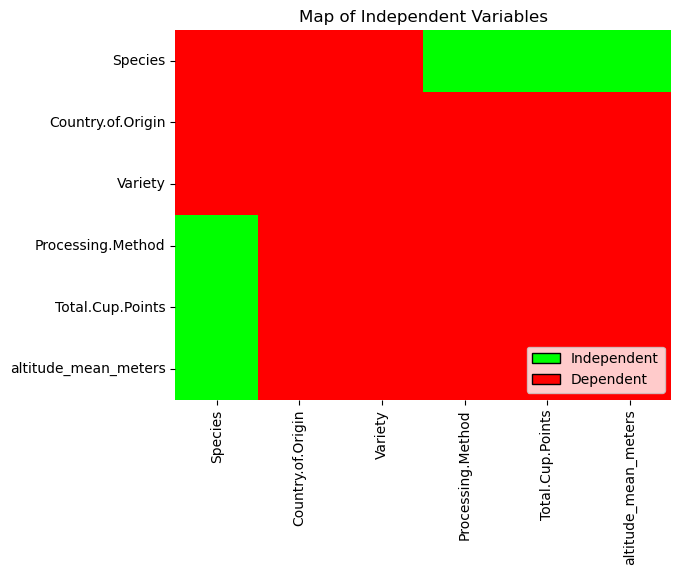

In [27]:
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='#00ff00', edgecolor='black',
                         label='Independent'),
                  Patch(facecolor='#ff0000', edgecolor='black',
                         label='Dependent')]

colors = sns.color_palette(['#ff0000', '#00ff00'], as_cmap = True)
plt.legend(handles = legend_elements, loc = 'lower right')
plt.title("Map of Independent Variables")

sns.heatmap(independence_chart, cbar = False, cmap = colors)

It seems like the only variables that are independent from eachother are species and processing method, and species and altitude. However, species is also independent from the total cup points, which indicates that it does not seem like a great variable to use for our model.

In [21]:
x = data['altitude_mean_meters']
y = data['Total.Cup.Points']

f = figure(width = 400, height = 400, title = "Total Score vs Altitude")
f.xaxis.axis_label = "Mean Altitude (m)"
f.yaxis.axis_label = "Total Score"

f.scatter(x = x, y = y)
show(f)

In [22]:
data[['altitude_mean_meters', 'Total.Cup.Points']].corr()

,altitude_mean_meters,Total.Cup.Points
altitude_mean_meters,1.000000,-0.024591
Total.Cup.Points,-0.024591,1.000000


Altitude is also not a good variable to use in our model, which has -2% correlation (it should have -20% or 20% to have at least some sort of correlation).

Here are the raw p values (the lower the value, the more dependent it is):

In [23]:
cats = ['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Variety', 'Processing.Method']

p_chart[cats].loc[cats]

,Total.Cup.Points,Species,Country.of.Origin,Variety,Processing.Method
Total.Cup.Points,1.706446e-192,7.735075e-01,6.224702e-28,1.990212e-09,3.908257e-02
Species,7.735075e-01,9.747420e-135,1.405471e-112,8.665842e-21,3.513549e-01
Country.of.Origin,6.224702e-28,1.405471e-112,0.000000e+00,0.000000e+00,2.458140e-70
Variety,1.990212e-09,8.665842e-21,0.000000e+00,0.000000e+00,1.120545e-23
Processing.Method,3.908257e-02,3.513549e-01,2.458140e-70,1.120545e-23,0.000000e+00


Both altitude and species have little to no relation to the taste score. Variety, processing method, and country of origin are all very closely related to eachother and dependent. Out of all of them, country of origin is the one most closely related to the taste score. So to improve the naive bayes model, only country of origin is used.

In [24]:
features = NB_data['Country.of.Origin']
features = pd.get_dummies(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state = 1)

B = BernoulliNB().fit(train_features, train_labels)
B.score(test_features, test_labels)

0.7

The accuracy is roughly the same as it was before, which is only marginally better than guessing.

In [25]:
B.score(train_features, train_labels)

0.7015151515151515

The accuracy the training and testing data are the same, which indicates that the model fits well.

### Mapping which Countries have Good Coffee

The code below creates a map of which countries are predicted to have good coffee based on the naive bayes model. A custom made input of data is used with each data point being it's own individual country.

<AxesSubplot:title={'center':'Good/Bad Coffee by Country'}>

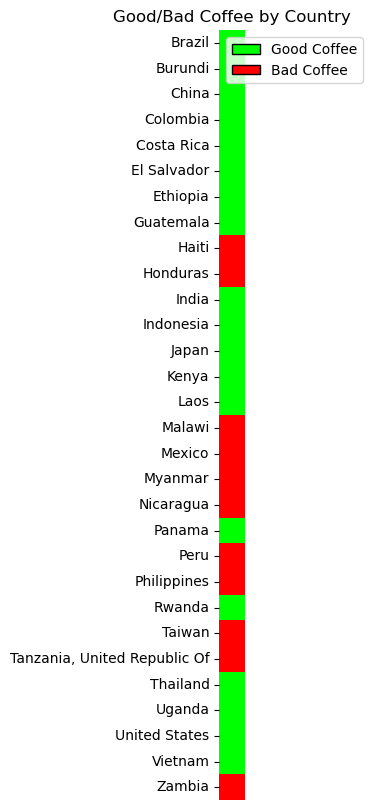

In [29]:
countries = data['Country.of.Origin'].unique()
countries.sort()

list_countries = pd.DataFrame()
list_countries['Country.of.Origin'] = countries

list_countries = pd.get_dummies(list_countries)

predictions = B.predict(list_countries)

legend_elements = [Patch(facecolor='#00ff00', edgecolor='black',
                         label='Good Coffee'),
                  Patch(facecolor='#ff0000', edgecolor='black',
                         label='Bad Coffee')]

table_predicts = pd.DataFrame(predictions, columns = ['Good Coffee'], index = countries)
colors = sns.color_palette(['#ff0000', '#00ff00'], as_cmap = True)

plt.figure(figsize = (1,10))
plt.legend(handles = legend_elements, loc = 'upper left')
plt.title("Good/Bad Coffee by Country")

sns.heatmap(table_predicts, square = True, yticklabels = countries, xticklabels = False, cbar = False, cmap = colors)

## Linear Regression

Instead of just classifying coffee into good or bad, I want to see which countries have the best and worst coffee, and see if this is better than using naive bayes. To do this, linear regresion is used.

There are several possible problems with using linear regression. Since linear regression uses continuous inputs, dummy variables are still going to be used, which might not be the best since they are only 0's and 1's. Also, since some countries do not have many entries of data, and since the data does not seem to be correlated much, there will probably be problems with fitting in the model. 

In [30]:
linear_data = data.copy()
cats = ['Country.of.Origin', 'Total.Cup.Points']

linear_data = linear_data[cats]
linear_data = pd.get_dummies(linear_data, columns = ['Country.of.Origin'])

labels = linear_data['Total.Cup.Points']
features = linear_data.drop(['Total.Cup.Points'], axis = 1)

The LinearRegression class from sklearn is used to generate the model, and to compute the coefficient of determination.

In [31]:
from sklearn.linear_model import LinearRegression

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state = 1)

lin_reg = LinearRegression().fit(train_features, train_labels)
lin_reg.score(test_features, test_labels)

-2.7815702948099247e+23

The coefficient of determination is a large negative number, which I did not think was possible, but according to documentation it can be because the model can be "arbitrarily worse". 

In [32]:
countries = data['Country.of.Origin'].unique()
countries.sort()

list_countries = pd.DataFrame()
list_countries['Country.of.Origin'] = countries

list_countries = pd.get_dummies(list_countries)

predictions = lin_reg.predict(list_countries).astype(int)

table_predict = pd.DataFrame(predictions, columns = ['Taste Score'], index = countries)
table_predict

,Taste Score
Brazil,82
Burundi,22124507827638
China,82
Colombia,83
Costa Rica,82
El Salvador,82
Ethiopia,85
Guatemala,82
Haiti,75
Honduras,80


Each country seems to have normal predicted scores, except Burundi, which seems to be causing the negative coefficient of determination.

In [33]:
data[data['Country.of.Origin'] == 'Burundi']

,Species,Country.of.Origin,Variety,Processing.Method,Total.Cup.Points,altitude_mean_meters
412,Arabica,Burundi,Bourbon,Washed / Wet,83.33,1880.0


There is only one data point for Burundi, so the low amount of entries for this country is probably why linear regression is a bad model for this.

After playing around with some different train test splits, I found a split that does not have this problem, and I will use it to construct a map of countries with the best and worst coffees.

In [34]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state = 11)

lin_reg = LinearRegression().fit(train_features, train_labels)
lin_reg.score(test_features, test_labels)

0.1213187593038626

In [35]:
lin_reg.score(train_features, train_labels)

0.29714424590457955

The coefficient of determination for the test data is only 12%, which is very low. For the training data it is 30%, which is still pretty low, but considerably larger than the test data, which indicates that the training data is being overfit to linear regression.

The following code creates a map of the linear regression scores of the countries using this linear regression model.

<AxesSubplot:title={'center':'Countries Ranked by Coffee Quality'}>

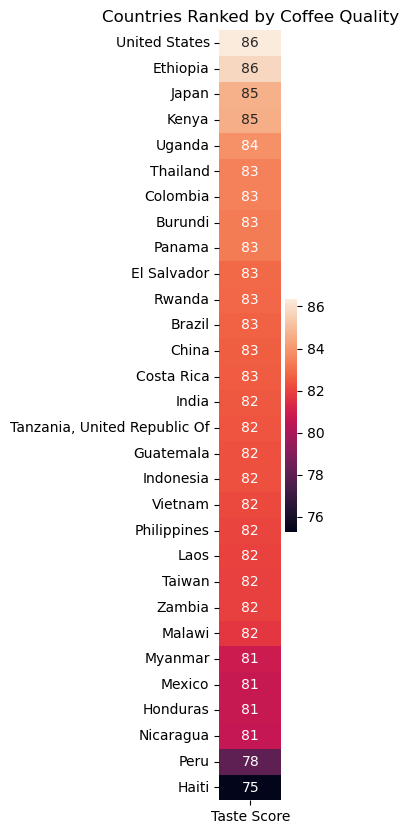

In [36]:
countries = data['Country.of.Origin'].unique()
countries.sort()

list_countries = pd.DataFrame()
list_countries['Country.of.Origin'] = countries

list_countries = pd.get_dummies(list_countries)

predictions = lin_reg.predict(list_countries)

table_predict = pd.DataFrame(predictions, columns = ['Taste Score'], index = countries)
table_predict = table_predict.sort_values(['Taste Score'], ascending = False)


plt.figure(figsize = (1,10))
plt.title("Countries Ranked by Coffee Quality")

sns.heatmap(table_predict, annot = True)

## Conclusion

I chose naive bayes since many of the inputs are categorical, and cannot be converted into continuous variables for accurate predicting with regression models. The taste score was converted into binary categories, good and bad, to turn it into a classification problem. However, even when the model was improved by removing variables that were dependent on eachother (since naive bayes assumes independence between the variables), and finding out that the country of origin correlates the most with the total taste score, the accuracy of the model was only 70%, which is only marginally better than guessing (58%).

Even though I knew linear regression would cause many problems, I wanted to see which countries would be considered the best and worst and also compare it to the naive bayes model. There were problems with fitting with the data, which made the model basically unusuable, and even when it was artificially selected in such a way that it does not generate the same problems, the coefficient of determiniation was pretty low and the model was overfit. 